## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 56ms/step - loss: 0.5430 - accuracy: 0.7818 - val_loss: 0.4299 - val_accuracy: 0.8602
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3380 - accuracy: 0.8975 - val_loss: 0.3283 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2448 - accuracy: 0.9235 - val_loss: 0.2882 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1913 - accuracy: 0.9375 - val_loss: 0.2780 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1531 - accuracy: 0.9506 - val_loss: 0.2759 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1227 - accuracy: 0.9621 - val_loss: 0.2867 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1016 - accuracy: 0.9702 - val_loss: 0.3109 - val_accuracy: 0.8835
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [ ]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [ ]:
#model2.compile()
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

#model2.fit()
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.8035 - val_accuracy: 0.8621
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.8582 - val_accuracy: 0.8617
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0095 - accuracy: 0.9978 - val_loss: 0.8859 - val_accuracy: 0.8644
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 7.3677e-04 - accuracy: 1.0000 - val_loss: 0.9028 - val_accuracy: 0.8630
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 5.8411e-04 - accuracy: 1.0000 - val_loss: 0.9348 - val_accuracy: 0.8623
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.9899 - val_accuracy: 0.8607
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 3.6028e-04 - accuracy: 1.0000 - val_loss: 0.9990 - val_accuracy: 0.8599
E

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

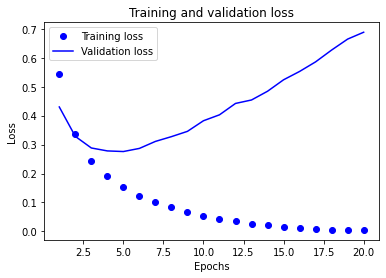

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [ ]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])


In [ ]:
## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_dropout = model2_dr.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
18/18 [==============================] - 1s 37ms/step - loss: 0.5215 - accuracy: 0.8634 - val_loss: 0.4660 - val_accuracy: 0.8693
Epoch 2/20
18/18 [==============================] - 0s 22ms/step - loss: 0.3213 - accuracy: 0.9013 - val_loss: 0.4399 - val_accuracy: 0.8633
Epoch 3/20
18/18 [==============================] - 0s 21ms/step - loss: 0.2439 - accuracy: 0.9224 - val_loss: 0.4138 - val_accuracy: 0.8705
Epoch 4/20
18/18 [==============================] - 0s 21ms/step - loss: 0.2009 - accuracy: 0.9394 - val_loss: 0.4367 - val_accuracy: 0.8695
Epoch 5/20
18/18 [==============================] - 0s 23ms/step - loss: 0.1583 - accuracy: 0.9608 - val_loss: 0.4387 - val_accuracy: 0.8702
Epoch 6/20
18/18 [==============================] - 0s 21ms/step - loss: 0.1346 - accuracy: 0.9686 - val_loss: 0.4670 - val_accuracy: 0.8685
Epoch 7/20
18/18 [==============================] - 0s 23ms/step - loss: 0.1106 - accuracy: 0.9772 - val_loss: 0.4530 - val_accuracy: 0.8717
Epoch 8/20
18

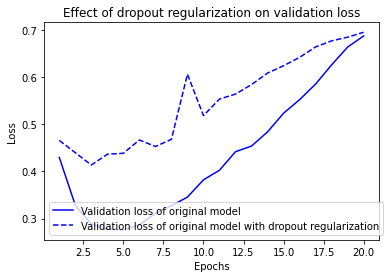

In [ ]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of original model with dropout regularization")
plt.title("Effect of dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [ ]:
from keras import regularizers

In [ ]:
## Add l1 regularization on the second dense layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, 
                 kernel_regularizer= regularizers.l1(0.001), 
                 activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [ ]:
model2_dr.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_l1_reg = model2_dr.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
18/18 [==============================] - 1s 41ms/step - loss: 0.0379 - accuracy: 0.9976 - val_loss: 0.7126 - val_accuracy: 0.8687
Epoch 2/20
18/18 [==============================] - 0s 22ms/step - loss: 0.0306 - accuracy: 0.9997 - val_loss: 0.7184 - val_accuracy: 0.8677
Epoch 3/20
18/18 [==============================] - 0s 23ms/step - loss: 0.0296 - accuracy: 0.9997 - val_loss: 0.7235 - val_accuracy: 0.8678
Epoch 4/20
18/18 [==============================] - 0s 21ms/step - loss: 0.0301 - accuracy: 0.9993 - val_loss: 0.7700 - val_accuracy: 0.8580
Epoch 5/20
18/18 [==============================] - 0s 23ms/step - loss: 0.0273 - accuracy: 0.9998 - val_loss: 0.7369 - val_accuracy: 0.8638
Epoch 6/20
18/18 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 0.9998 - val_loss: 0.7416 - val_accuracy: 0.8628
Epoch 7/20
18/18 [==============================] - 0s 21ms/step - loss: 0.0255 - accuracy: 0.9998 - val_loss: 0.8299 - val_accuracy: 0.8502
Epoch 8/20
18

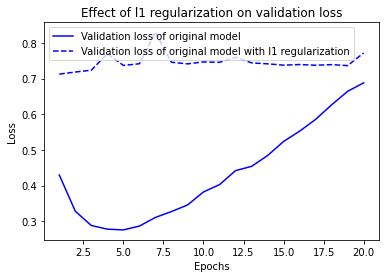

In [ ]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
val_loss2 = history_l1_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of original model with l1 regularization")
plt.title("Effect of l1 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()